<a href="https://colab.research.google.com/github/nisabeauty/UTS-AI-for-DS/blob/main/UTS_AI_for_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [ ]:
!git clone https://github.com/nisabeauty/UTS-AI-for-DS.git

Cloning into 'UTS-AI-for-DS'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (323/323), done.
remote: Compressing objects: 100% (321/321), done.
remote: Total 323 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (323/323), 21.99 MiB | 6.97 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from sklearn.model_selection import train_test_split

In [ ]:
# 1. Load dan Preprocess Dataset
base_dir = "UTS-AI-for-DS"  # Ganti jika folder beda
class_names = ["keyboard", "mouse", "headphone"]
img_size = (64, 64)

images = []
labels = []

for label, class_name in enumerate(class_names):
    class_path = os.path.join(base_dir, class_name)
    for fname in os.listdir(class_path):
        fpath = os.path.join(class_path, fname)
        try:
            img = load_img(fpath, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {fpath}: {e}")

images = np.array(images)
labels = to_categorical(labels, num_classes=3)


In [ ]:
# 2. Split Data (Train/Test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# ANN

In [ ]:
# 1. Bangun Model ANN
model_ann = models.Sequential([
    layers.Flatten(input_shape=(img_size[0], img_size[1], 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # output 3 kelas
])

model_ann.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 2. Latih Model
model_ann.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4231 - loss: 3.3909 - val_accuracy: 0.4583 - val_loss: 1.4353
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5713 - loss: 0.9811 - val_accuracy: 0.6458 - val_loss: 1.1490
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6170 - loss: 1.1090 - val_accuracy: 0.6875 - val_loss: 0.9119
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7606 - loss: 0.5789 - val_accuracy: 0.6042 - val_loss: 1.6530
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6892 - loss: 0.7867 - val_accuracy: 0.6250 - val_loss: 1.1788
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8852 - loss: 0.3337 - val_accuracy: 0.7292 - val_loss: 0.7681
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9090 - loss: 0.2510 - val_accuracy: 0.6667 - val_loss: 0.7506
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9199 - loss: 0.2149 - val_accuracy: 0.5833 - val_loss: 1.

In [ ]:
# 3. Evaluasi
test_loss, test_acc = model_ann.evaluate(X_test, y_test)
print(f"Akurasi Testing: {test_acc:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8042 - loss: 0.5918 
Akurasi Testing: 0.80


In [53]:
# 4. Prediksi Gambar Baru
def predict_custom_image(model, image_path):
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_id = np.argmax(prediction)
    confidence = prediction[0][class_id]
    plt.imshow(img)
    plt.title(f"Prediksi: {class_names[class_id]} ({confidence:.2f})")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


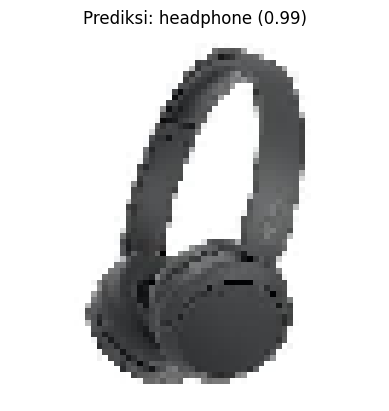

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


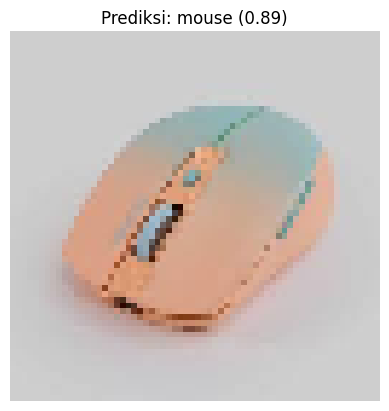

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


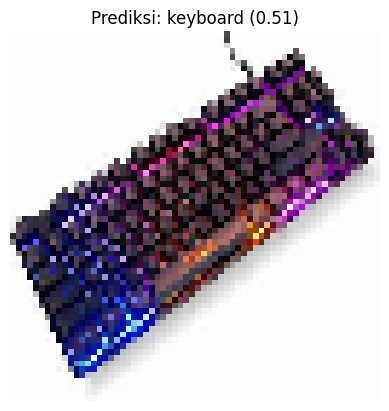

In [54]:
predict_custom_image(model_ann,"UTS-AI-for-DS/headphone.jpeg")
predict_custom_image(model_ann,"UTS-AI-for-DS/mouse.jpeg")
predict_custom_image(model_ann,"UTS-AI-for-DS/keyboard.jpeg")

# CNN

In [59]:
# 1. Bangun Model CNN Klasifikasi 3 Kelas
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Tiga kelas
])

model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 2. Latih Model
model_cnn.fit(X_train, y_train, epochs=20, batch_size=4, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.4739 - loss: 1.0526 - val_accuracy: 0.6875 - val_loss: 0.6993
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7704 - loss: 0.4575 - val_accuracy: 0.6667 - val_loss: 0.7719
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8697 - loss: 0.2528 - val_accuracy: 0.7083 - val_loss: 0.7591
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9560 - loss: 0.1359 - val_accuracy: 0.7292 - val_loss: 0.8055
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9789 - loss: 0.1020 - val_accuracy: 0.7917 - val_loss: 0.9085
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9768 - loss: 0.0720 - val_accuracy: 0.8125 - val_loss: 1.0512
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9848 - loss: 0.0368 - val_accuracy: 0.8333 - val_loss: 1.0643
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9966 - loss: 0.0141 - val_accuracy: 0.7917 - val_loss: 1.

In [ ]:
# 3. Evaluasi
test_loss, test_acc = model_cnn.evaluate(X_test, y_test)
print(f"Akurasi Uji: {test_acc:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9347 - loss: 0.3848 
Akurasi Uji: 0.93


In [56]:
# 4. Prediksi Gambar Baru
def predict_custom_image_cnn(model, image_path):
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_id = np.argmax(prediction)
    confidence = prediction[0][class_id]
    plt.imshow(img)
    plt.title(f"Prediksi: {class_names[class_id]} ({confidence:.2f})")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


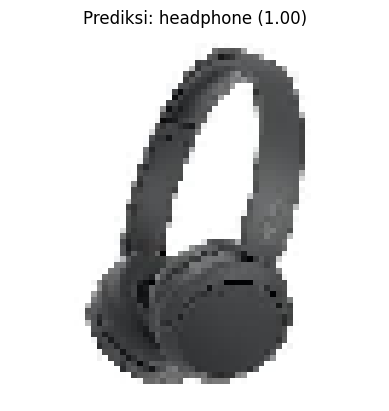

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


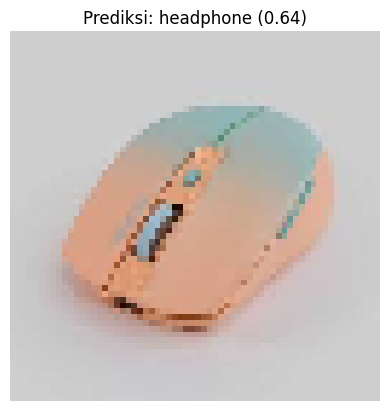

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


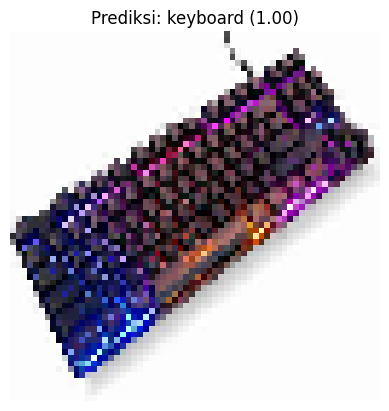

In [58]:
predict_custom_image_cnn(model_cnn,"UTS-AI-for-DS/headphone.jpeg")
predict_custom_image_cnn(model_cnn,"UTS-AI-for-DS/mouse.jpeg")
predict_custom_image_cnn(model_cnn,"UTS-AI-for-DS/keyboard.jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


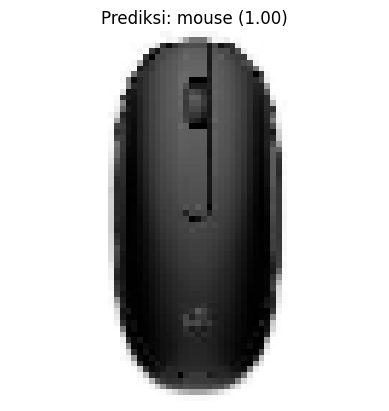

In [60]:
predict_custom_image_cnn(model_cnn,"/content/mouse1.jpeg")